In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
listings = pd.read_csv('data:sample_listings.csv', skiprows=1)
waitlist = pd.read_csv('data:wa_waitlist.csv', skiprows=1)

In [17]:
print(listings.columns)
print(waitlist.columns)

Index(['suburb', 'price_weekly', 'bedrooms', 'bathrooms'], dtype='object')
Index(['suburb', 'waitlist_count'], dtype='object')


In [18]:
df = pd.merge(listings.groupby("suburb").mean().reset_index(), waitlist, on="suburb")

In [19]:
# Calculating affordability score = rent / waitlist_count+1 to avoid division by zero
df['affordability_score'] = df['price_weekly'] / (df['waitlist_count'] + 1)
df = df.sort_values(by='affordability_score')
print(df)

      suburb  price_weekly  bedrooms  bathrooms  waitlist_count  \
3      Perth         350.0       2.0        1.0             120   
0   Armadale         280.0       3.0        1.0              80   
1  Fremantle         420.0       2.0        2.0              60   
2  Joondalup         300.0       1.0        1.0              20   

   affordability_score  
3             2.892562  
0             3.456790  
1             6.885246  
2            14.285714  


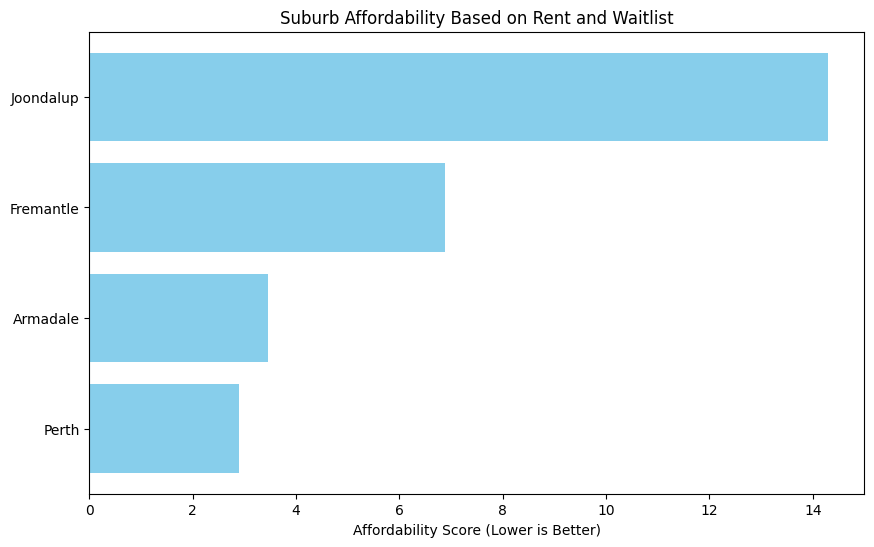

In [20]:
plt.figure(figsize=(10,6))
plt.barh(df['suburb'], df['affordability_score'], color='skyblue')
plt.xlabel('Affordability Score (Lower is Better)')
plt.title('Suburb Affordability Based on Rent and Waitlist')
plt.show()

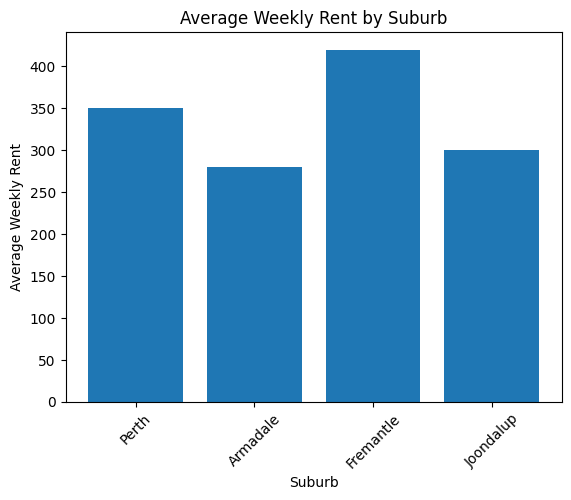

In [21]:
# Average rent per suburb
plt.bar(df['suburb'], df['price_weekly'])
plt.xlabel('Suburb')
plt.ylabel('Average Weekly Rent')
plt.title('Average Weekly Rent by Suburb')
plt.xticks(rotation=45)
plt.show()